# Pipes Counting(Started 26/08/21)

Counting pipes is an age old problem of many factories, warehouses and users.

## Requirement

The requirement is to able to count pipes, using a single independent system.

Design solutions that can:

* Count steel pipes of different diameter
* Handle situations like pipes getting stuck because pipes cannot be moved or cannot be freed to get an accurate count
* Tackle challenges like getting only a top view if drones are used
* Be used for counting stainless or PVC pipes

Specifications 

Typical specifications of pipes and the environment of the pipe yard include:

1. Pipes are 1.66-48 inches in diameter and 30-60 feet long
2. Stacked in 3-20 layers but not higher than approx. 10ft.
3. There are more than 1000 pipes within 1 acre of the yard
4. A tag and/or a cap may be attached to the end of the tube

In the case of large diameter pipes:

1. The pipe stacks are often several hundred meters long
2. The distance between the stacks is often so narrow.

Given these conditions, it can be difficult to take a picture from the front. Therefore, it is necessary to go close to it in hot/cold weather and visually check it for a long duration to get accurate information.

Since each pipe weighs up to several tons, it is difficult to calculate the number of pipes by weighing them all at once.

Some examples to get you started to include, but are not limited to, using drones, RFID tags, or AI flash counting apps! These are just examples. There is a lot of room for innovation here so we are looking forward to your unusual, out-of-the-box ideas to solve the given problem. Put on your thinking cap to build solutions and features that you believe in.

## White Hat(Information)

The data available to us are : 

Helpful : 
1. Minimum pipe diameter : 1.66 inches
2. Maximum pipe diameter : 48 inches 
3. Minimum pipe length : 30 feet
4. Maximum pipe length : 60 feet
5. Stacked in 3-20 layers but not higher than approx. 10ft.
6. A tag and/or a cap may be attached to the end of the tube
7. pipes cannot be moved or cannot be freed to get an accurate count

Not helpful :
1. There are more than 1000 pipes within 1 acre of the yard
2. The pipe stacks are often several hundred meters long
3. The distance between the stacks is often narrow.

### Images

![Small Pipes](resources/2303e120.jpg)
![Large pipes distant](resources/998d98e.jpg)
![Small capped pipes](resources/b002434.jpg)
![Large Pipes in field](resources/ba82b6c.jpg)
![Large Pipes in a Shipyard](resources/c184c91.jpg)

Immediate Questions :

1. What is the current pipes counting process like?
2. Can the tags be eliminated during analysis?
3. Does the operator always know the exact dimensions of the pipe?
4. What is the error margin currently?
5. What is the current operating cost for 'counting'?
6. Which parameters will we be willing to change or modify in the interest of counting?
7. Is there a Warehouse system in place, such as SAP or any other?
8. What do the tags represent?

## Red(Intuition)

1. Lighting in the area is never fixed
2. A more machine oriented approach is required, due to weather
3. Some of the stacks of pipes are bundled
4. Not enough clearance will be available on the ground always
5. Creating a fixed mount, might be difficult
6. Being that lazy people are the best effort reducers, they must have a spot that they like to do the counting from.
7. The recipients of a bulk would need this more than the manufacturer.
8. This will help most in pick count verification after stock recieve

## Yellow(Value)

What are the benefits of succeeding in this venture?

1. Lowered operating cost for manufacturers
2. Lowered operating cost for buyers
3. Reduction in error margin
4. Improved workplace
5. Improved productivity
6. Time saving

We would be able to achieve these, if 
1. operating and maintenance cost of the proposed solution is lesser than the current operating cost
2. It is operatable remotely
3. Sustainable, in terms of continued space availability

## Black(Criticality)

Potential problems : 
1. The caps and tags
2. Lighting
3. Unspecified length frame
4. Packing density

The requirement has been phrased to require a 'code'.

```
Idea Submission Guidelines 

Please follow these guidelines while making your idea submission:

Your idea submission must include the following:

    Idea Title: Written on cover page
    Problem Statement: What is the specific problem?
    Approach: How will you solve it? Problem by technology (your solution)
    Overview with a diagram: Share your solutions/prototype mock image & business model with a diagram

Project Submission Guidelines 

Please follow these guidelines while making your final project submission:

    You may submit your project as many times as your like. Only the final submission will be judged.
    All projects must contain the following in their submission
        Project overview (3-4 sentences explaining what you built)
        Link to the code on Github
        Presentation (in the form of PowerPoint or youtube video) of your project
            Youtube – no longer than 4 minutes
            PPT – no more than 12 slides
```

## Green(Ideas)



## Blue(Process control)

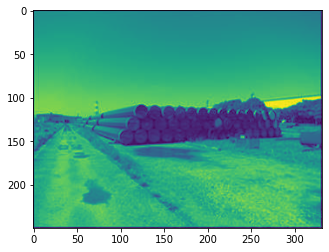

In [1]:
import numpy
import cv2
from matplotlib import pyplot

img = cv2.imread('resources/998d98e.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pyplot.imshow(img)

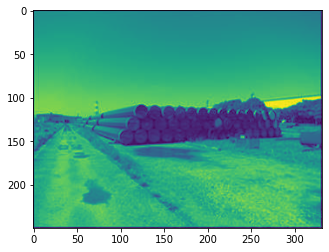

In [2]:
# img = cv2.medianBlur(img,1)
# cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cimg = img
pyplot.imshow(cimg)

In [3]:
# cimg = img
# circles = cv2.HoughCircles(cimg, cv2.HOUGH_GRADIENT, 1, 30, param1=80,param2=20,minRadius=0,maxRadius=0)#2, gray.rows/4, 200, 100

# if isinstance(circles, numpy.ndarray):
#     circles = np.uint16(np.around(circles))
#     for i in circles[0, : ] :
#         # draw the outer circle
#         cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#         # draw the center of the circle
#         cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
#     pyplot.imshow(cimg)
# else : 
#     print('HoughCircles failed')
# del cimg
# del circles

After attempting to use HoughCircles, the method fails miserably. It also has a drawback that it can't detect elipses.

Trying out another simplistic approach, using skimage.

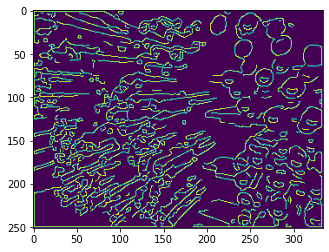

In [13]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte, io
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

# Load picture, convert to grayscale and detect edges
image_rgb = io.imread('resources/b002434.jpg')
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=1.0, low_threshold=0.55, high_threshold=0.8)
pyplot.imshow(edges)

In [5]:

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()

ValueError: Cannot specify order when the array has no fields.